# Laboratorio 1: Machine Learning

Ignacio Loayza 201273604-8<br>
Camilo Pérez 201273533-5<br>

# 1) Regresión Lineal Ordinaria

In [1]:
# megacelda inicial con imports de todo tipo

# uno de nosotros usa python 2 y el otro python 3
from __future__ import print_function, unicode_literals

# estadistica
import pandas as pd

# numpy
import numpy as np

# normalizacion
from sklearn.preprocessing import StandardScaler

# regresion lineal
import sklearn.linear_model as lm

# division del conjunto en entrenamiento y testing
from sklearn.model_selection import train_test_split

# errores y cosas para calcular z-scores
from numpy.linalg import pinv
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# validacion cruzada
from sklearn.model_selection import KFold

# en algun momento argumentamos a favor del coeficiente de determinacion como metrica valida
from sklearn.metrics import r2_score

# regularizacion
from sklearn.linear_model import Ridge, Lasso

# comparacion de precision
from sklearn.metrics import accuracy_score

# graficos
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Ignacio/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## (a) Importe y Visualización del Dataset
> Podemos imprimir los primeros valores del dataset con la función *Head( )*, antes y despues de aplicado el comando drop.

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(['id','date','zipcode',], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


> La función *drop( )* elimina las columnas mencionadas como argumento, del dataset, este proceso es parte de la limpieza inicial de todo dataset, donde se debe preparar el mismo para su análisis.

## (b) Descripcion del Dataset

> La función *.shape( )* permite conocer las dimensiones del dataset, en este caso, luego de haber eliminado las variables no utilizadas para el análisis: <br>
- **Número de filas:** 21613 <br>
- **Número de columnas:** 18

In [4]:
df.shape

(21613, 18)

> La función *info()* entrega un resumen general de las columnas del dataset, la cantidad de filas de cada una y el tipo de dato que almacena. Para el dataset kc_house_data utilizado, la mayoría de las columnas están formateadas para almacenar registros de tipo entero de 64 bits de largo de registro y punto flotante del mismo largo. Adicionalmente la cantidad de memoria utilizada para almacenar el dataset es de 3.5MB aprox.<br>
<br>
Gran parte de las columnas del dataset corresponden a **variables numéricas discretas**, las cuales entregan información sobre propiedades consideradas de relevancia para poder determinar el precio en el mercado de una vivienda.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


> La función *.describe( )* entrega estadísiticos de tendencia y dispersión de las variables del dataset, además se hace un redondeo a dos cifras decimales para mejor lectura de los valores. <br>


In [6]:
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,0.14,0.14,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,47.78,-121.32,6210.00,871200.00


> A partir de la tabla de resumen de estadísticos obtenida podemos empezar a notar algunas cosas interesantes:
- La media de la variable precio cae cerca de las 540000 unidades monetarias y el tercer cuartíl cerca de las 645000, sin embargo, el precio máximo es de 7700000 unidades monetarias. Un comportamiento similar se observa en las variables *bedrooms* (habitaciones), *bathrooms* (número de baños), *sqft_living* (pies cuadrados hábiles de la vivienda) y *sqft_lot* (pies cuadrados del terreno de construcción), este comportamiento sugiere la existencia de un grupo de ouliers, viviendas con un alto valor monetario respaldado por propiedades de las mismas considerablemente superiores a las de los tres primeros cuartiles del dataset.
- El 75% de las viviendas fueron construidas dentro de los años 1900 y 1997, siendo la mediana el año 1975, sobre esto, un 25% de las viviendas se construyeron entre los años 1997 y 2015 pudiendo explicar parte de la gran diferencia de precio entre un pequeño conjunto de viviendas.
- El 75% de las viviendas posee un puntaje de condición (variable *condition*) de 4.00, lo que sugiere que en general todas las viviendas medidas en el dataset se encontraban en buen estado.
- Es interesante notar que la media la variable *sqft_living* (pies cuadrados hábiles de la vivienda) es menor en comparación con el valor de la misma variable, para la medición realizada el año 2015, sin embargo, la cantiad de viviendas medidas es la misma (2163), o mismo sucede con la variable *sqft_lot* (pies cuadrados del terreno de construcción). Se sabe que el valor de las variables *sqft_living15* y *sqft_lot15* son los valores medidos el año 2015, en los cuales se incluye las remodelaciones realizadas a la vivienda. La disminución de los valores del par de variables sugiere que interesantemente, aunque la cantidad de viviendas no cambió, producto de las remodelaciones si disminuyó la superficie de terreno de construcción y de vivienda.

## (c) Normalización de Datos

> Escalar una variable permite ajustar su rango de valores a un rango acotado predefinido, este tipo de preprocesamiento se utiliza cuando el modelo que se tiene es sensible a magnitudes, en nuestro caso, la variable objetivo para la regresión es *price*, la cual presenta rangos de valores en magnitudes demasiado distintas en comparación a los atributos con los que alimentaremos el modelo, como el número de baños (rango 0-8), el número de habitaciones (rango 0-33), etc. Si no se escala la variable, se generará un modelo en el cual, al aumentar en un pequeño diferencial el atributo (*feature*), la variable objetivo de la predicción experimentará un aumento considerable.<br>
<br>
Es interesante notar que algunos algoritmos pueden mejorar considerablemente su rapidez de convergencia con datos normalizados (SVM, por ejemplo). En nuestro caso, puesto que se realizará una regresión lineal de mínimos cuadrados, la normalización no tiene este tipo de efecto pues no varía la correlación de los coeficientes al ser términos lineales. Podemos ver como la dispersión de los valores de la variable se reduce notablemente:


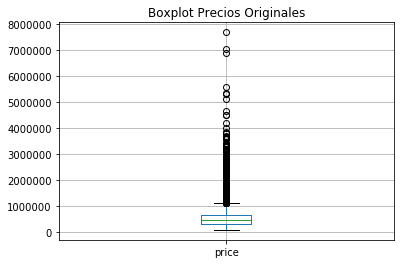

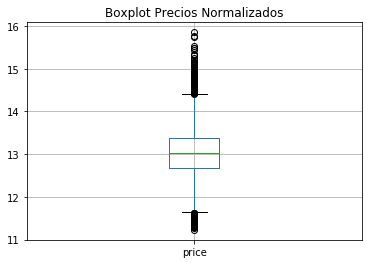

In [7]:
df.boxplot(column = ['price'], return_type = 'axes')
plt.title('Boxplot Precios Originales');
plt.show()
# Normalizamos la variable precio
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled['price'] = np.log(df['price'])
df_scaled.boxplot(column = ['price'], return_type = 'axes')
plt.title('Boxplot Precios Normalizados')
plt.show()

#df_scaled.boxplot(column= [''], showfliers = False)
#plt.xticks(rotation=75)
#plt.show()

> La normalización de variables en un dataset se utiliza, por lo general, cuando necesitamos aplicar un proceso que requiere normalidad en la variable, o un escalamiento para acotar los valores de ciertas variables a un cierto rango tratable y comparable con los de otras variables. Podemos observar los histogramas de la variable precio antes y despues de normalizarla:

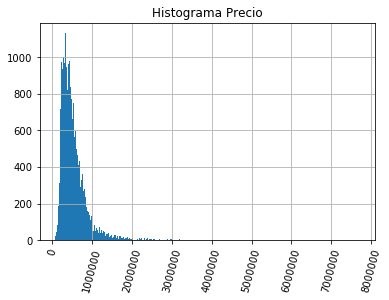

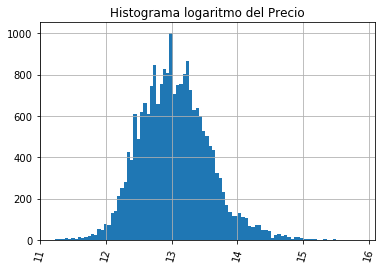

In [8]:
df.hist(column= ['price'], bins = 'fd', xrot = 75)
plt.title('Histograma Precio')
# Normalizamos la variable precio
df_scaled.hist(column=['price'], bins = 'fd', xrot = 75)
plt.title('Histograma logaritmo del Precio')
plt.show()

## (d) Regresión Lineal

In [9]:
X = df_scaled.iloc[:, 1:]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N)) #Se crea una columna nueva dentro de las variables predictoras llamada 'intecept'
y = df_scaled['price'] # asignamos como target la variable 'price'

# hay una forma mucho mas facil de hacer esto!, usando la misma libreria sklearn...
# codigo original dejado como referencia

'''
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara == 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
'''

#Separamos los subsets de test y train
Xtrain, Xtest, ytrain, ytest,  = train_test_split(X,y,test_size = 0.3, random_state = 65)

>  La idea del paso 4 es deshacerse del problema de tener que generar el intercepto al agregarlo como un atributo mas al dataset. Al estar compuesto únicamente de 1s para todas las entradas, entonces el modelo es capaz de apreciar que las variables son evidentemente independientes de este intercepto, pero es capaz de usarlo para ajustar la posición de la recta entregada. De no hacer esto, habría que aplicar alguna técnica o forma para obtener el intercepto de forma independiente y posteriormente unirlo al modelo.

## (e) Z-Scores
Para calcular el Z-Score de los coeficientes, podemos utilizar la siguiente ecuación:
$$Z-Score(\beta_j) = \frac{\hat{\beta_j}}{\hat{\sigma}\sqrt{v_j}}$$
Donde:<br>
- $v_j$ es el j-ésimo elemento diagonal de la matríz $(X^TX)^{-1}$<br>
- $\hat{\sigma}$ es el estimador de la varianza


In [10]:
#Creamos el modelo, entrenamos y recuperamos los coeficientes de la regresion
#pd.set_option('display.float_format', lambda x: '%.4f'%x)
#pd.reset_option("display.float_format")

linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain,ytrain);
#print("Coeficientes: \n", linreg.coef_[:].tolist())
names = [i for i in list(df_scaled.iloc[:,1:])]
names.append('intercept')
coefficients = linreg.coef_

#Ahora debemos calcular el error estándar a partir de la ecuación (1)
model = sm.OLS(ytrain,Xtrain)
results = model.fit()
print(results.summary())


n = Xtrain.shape[1]
m = Xtrain.shape[0]

#mse = mean_squared_error(linreg.predict(Xtrain),ytrain)
MSE = np.sum((ytrain-linreg.predict(Xtrain).T)**2)/(m-n-1)
var_est = np.diag(np.linalg.pinv(np.dot(Xtrain.T,Xtrain)))
SE_est = np.sqrt(MSE*var_est)

#mse = mean_squared_error(ytrain,ypred)
#var_est = mse*np.diag(inv(np.dot(Xtrain.T,Xtrain)))
#SE_est = np.sqrt(var_est)

# Calculamos el error cuadratico medio a partir de la prediccion del modelo sobre los datos de train

#v_diag = np.diag(inv(np.dot(Xtrain.T,Xtrain)))

#SE_est = np.sqrt(mse*v_diag)
#Luego el error estandar será:
#std_error = np.sqrt(mse*v_diag)


#std_coef = Xtrain.std()
z_scores = (linreg.coef_/SE_est)

#Creamos un DataFrame con las variables pedidas
table = pd.DataFrame({'Atributo':Xtrain.columns.tolist(),'Coeficiente':coefficients,'Z-Score':z_scores,'Error Estandar':SE_est})
table = table[['Atributo','Coeficiente','Error Estandar','Z-Score']] #Reordenar las columnas para que se vea bien
table

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     3123.
Date:                Sat, 14 Oct 2017   Prob (F-statistic):               0.00
Time:                        11:37:32   Log-Likelihood:                -795.08
No. Observations:               15129   AIC:                             1624.
Df Residuals:                   15112   BIC:                             1754.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.0108      0.003     -4.137

,Atributo,Coeficiente,Error Estandar,Z-Score
0,bedrooms,-1.176308e-02,0.002621,-4.488171e+00
1,bathrooms,5.492932e-02,0.003816,1.439365e+01
2,sqft_living,1.158149e+12,0.002383,4.860010e+14
3,sqft_lot,1.632244e-02,0.003041,5.367799e+00
4,floors,3.910828e-02,0.002947,1.327021e+01
5,waterfront,3.359118e-02,0.002261,1.485809e+01
6,view,4.251228e-02,0.002473,1.719042e+01
7,condition,4.553883e-02,0.002291,1.987816e+01
8,grade,1.877292e-01,0.003821,4.912855e+01
9,sqft_above,-1.044218e+12,0.002556,-4.085905e+14


> Para el cálculo de los z-scores se utilizó la pseudo-inversa en lugar de la inversa, pues era una solución al hecho de que la matríz es no invertible.
> Podemos usar una aproximación por percentiles para calcular el umbral de aceptación de un atributo basandonos en su Z-Score, para un nivel de significancia de $\alpha = 0.05$, podemos filtrar todos aquellos Z-score menores o iguales a 1.96, los cuales se pueden considerar como de poco peso para el modelo. los atributos con los que nos quedamos luego del filtrado son:

In [11]:
tab = table[table['Z-Score'].abs()>=1.96]
print(tab)
print("Cantidad de atributos previos al filtrado: ", len(z_scores))
print("Cantidad de atributos finales después del filtrado: ", len(tab))

         Atributo   Coeficiente  Error Estandar       Z-Score
0        bedrooms -1.176308e-02        0.002621 -4.488171e+00
1       bathrooms  5.492932e-02        0.003816  1.439365e+01
2     sqft_living  1.158149e+12        0.002383  4.860010e+14
3        sqft_lot  1.632244e-02        0.003041  5.367799e+00
4          floors  3.910828e-02        0.002947  1.327021e+01
5      waterfront  3.359118e-02        0.002261  1.485809e+01
6            view  4.251228e-02        0.002473  1.719042e+01
7       condition  4.553883e-02        0.002291  1.987816e+01
8           grade  1.877292e-01        0.003821  4.912855e+01
9      sqft_above -1.044218e+12        0.002556 -4.085905e+14
10  sqft_basement -5.580848e+11        0.002351 -2.373562e+14
11       yr_built -9.387207e-02        0.003210 -2.923936e+01
12   yr_renovated  1.539612e-02        0.002205  6.983306e+00
13            lat  1.871948e-01        0.002196  8.522554e+01
14           long -5.905151e-03        0.002543 -2.321706e+00
15  sqft

> Obtenemos una reducción de 9 dimensiones de atributos para el modelo. <br>
> Quizás sea interesante analizar un poco el modelo de regresión ahora que tenemos los coeficientes más trabajados y seleccionados:<br>
> - Primero, es interesantante notar que hay ciertos atributos con coeficiente de regresión negativos, lo que implica que como predictores actuan disminuyendo el valor pedicho para la variable objetivo 'precio', si observamos los atributos con esta propiedad, veremos que los pies cuadrados construidos sobre la casa (*'sqft_above'*), los pies cuadrados del sótano (*'sqt_basement'*) y el año de construcción (*'yr_built'*) actuan disminuyendo el precio de la vivienda, en algunas de estas variables parece ser un poco más intuitiva esta respuesta(como por ejemplo los pies cuadrados construidos de sotano, puede darse una tendencia a que las personas precindan de esta propiedad), sin embargo, llama la atención que el año de contrucción de la vivienda actúe con coeficiente negativo, uno tendería a pensar que las casas mas nuevas y modernas son mas caras y mejor equipadas que las antiguas.

> - Dentro de los atributos que más impacto tienen en el precio, destacan el número de baños de la vivienda y la cantidad de pies cuadrados hábiles para vivienda (de las viviendas medidas el 2015).

## (f) Correción del método

> Ya que asumimos que el error de los coeficientes estimados se comporta de la siguiente forma: $\epsilon \sim N(\beta, \sigma^2)$, la distribución del error es simétrica con respecto al valor esperado $\beta$ (coeficiente paramétrico de la regresión), con esto en cuenta, el Z-Score es de interés solo en su magnitud. Luego, podemos trabajar el error estandar del coeficiente en terminos de su valor absoluto.<br>
> Además, para evitar el problema de la no inversabilidad, se utilizó la pseudo-inversa.<br>
> Con la modificación, obtenemos entonces los siguientes resultados para el error estándar y los Z-Scores:<br>

In [12]:
# El nuevo error estandar será:
std_error_corrected = np.sqrt(MSE*abs(var_est))

#std_coef = Xtrain.std()
z_scores_corrected = (linreg.coef_.round(4)/std_error_corrected).round(4)

#Creamos un DataFrame con las variables pedidas
table_post_correct = pd.DataFrame({'Atributo':Xtrain.columns.tolist(),'Coeficiente':coefficients,'Z-Score':z_scores_corrected,'Error Estandar':std_error_corrected})
table_post_correct = table_post_correct[['Atributo','Coeficiente','Error Estandar','Z-Score']] #Reordenar las columnas para que se vea bien
table_post_correct

,Atributo,Coeficiente,Error Estandar,Z-Score
0,bedrooms,-1.176308e-02,0.002621,-4.502300e+00
1,bathrooms,5.492932e-02,0.003816,1.438600e+01
2,sqft_living,1.158149e+12,0.002383,4.860010e+14
3,sqft_lot,1.632244e-02,0.003041,5.360400e+00
4,floors,3.910828e-02,0.002947,1.326740e+01
5,waterfront,3.359118e-02,0.002261,1.486200e+01
6,view,4.251228e-02,0.002473,1.718550e+01
7,condition,4.553883e-02,0.002291,1.986120e+01
8,grade,1.877292e-01,0.003821,4.912090e+01
9,sqft_above,-1.044218e+12,0.002556,-4.085905e+14


> Luego del Filtrado:

In [13]:
tab_correct = table_post_correct[table_post_correct['Z-Score'].abs() >=1.96]
print("Cantidad de atributos previos al filtrado: ", len(z_scores_corrected))
print("Cantidad de atributos finales después del filtrado: ", len(tab_correct))
tab_correct

Cantidad de atributos previos al filtrado:  18
Cantidad de atributos finales después del filtrado:  17


,Atributo,Coeficiente,Error Estandar,Z-Score
0,bedrooms,-1.176308e-02,0.002621,-4.502300e+00
1,bathrooms,5.492932e-02,0.003816,1.438600e+01
2,sqft_living,1.158149e+12,0.002383,4.860010e+14
3,sqft_lot,1.632244e-02,0.003041,5.360400e+00
4,floors,3.910828e-02,0.002947,1.326740e+01
5,waterfront,3.359118e-02,0.002261,1.486200e+01
6,view,4.251228e-02,0.002473,1.718550e+01
7,condition,4.553883e-02,0.002291,1.986120e+01
8,grade,1.877292e-01,0.003821,4.912090e+01
9,sqft_above,-1.044218e+12,0.002556,-4.085905e+14


## (g) Estimación del Error de Predicción
> Usaremos Cross-Validation para estimar el error de predicción de nuestro modelo, con $K = 5$ y $K = 10$ *folds*.

In [14]:
yhat_test = linreg.predict(Xtest)
# Aqui en vez de usar el codigo provisto, utilizamos la funcion imporporada ya en sklearn
mse_test = mean_squared_error(ytrain,linreg.predict(Xtrain))


kf_10 = KFold(n_splits = 10)
kf_5 = KFold(n_splits = 5)
mse_cv = 0

# usaremos esto nuevamente para la regularizacion, como se utiliza bastante seguido la metodologia de obtener
#crossvalidation y regresion, lo implemente en una sola funcion apra llamarla en solo una linea
def cv_error(x_train,y_train,k, method = 'OLS', alpha = 1):
    Xm = x_train.as_matrix()
    ym = y_train.as_matrix()
    kf = KFold(n_splits = k)
    mse_cv = 0
    coef_v = []
    
    #OLS
    if(method == 'OLS'):
        for train, val in kf.split(Xm):
            linreg = lm.LinearRegression(fit_intercept=False)
            linreg.fit(Xm[train],ym[train])
            coef_v.append(linreg.coef_)
            yhat_val = linreg.predict(Xm[val])
            mse_fold = np.mean(np.power(yhat_val-ym[val], 2))
            mse_cv +=mse_fold
        coef_T = pd.DataFrame([[fold[x] for x in range(len(x_train.columns.tolist()))] for fold in coef_v])
        coef_T.columns = x_train.columns.tolist()
        return coef_T, mse_cv
    #Ridge
    elif(method == 'ridge'):
        for train, val in kf.split(Xm):
            ridgereg = lm.Ridge(alpha = alpha, fit_intercept=False)
            ridgereg.fit(Xm[train],ym[train])
            coef_v.append(ridgereg.coef_)
            yhat_val = ridgereg.predict(Xm[val])
            mse_fold = np.mean(np.power(yhat_val-ym[val], 2))
            mse_cv +=mse_fold
        coef_T = pd.DataFrame([[fold[x] for x in range(len(x_train.columns.tolist()))] for fold in coef_v])
        coef_T.columns = x_train.columns.tolist()
        return coef_T, mse_cv
    #Lasso
    elif(method == 'lasso'):
        for train, val in kf.split(Xm):
            lassoreg = lm.Lasso(alpha = alpha, fit_intercept=False)
            lassoreg.fit(Xm[train],ym[train])
            coef_v.append(lassoreg.coef_)
            yhat_val = lassoreg.predict(Xm[val])
            mse_fold = np.mean(np.power(yhat_val-ym[val], 2))
            mse_cv +=mse_fold
        coef_T = pd.DataFrame([[fold[x] for x in range(len(x_train.columns.tolist()))] for fold in coef_v])
        coef_T.columns = x_train.columns.tolist()
        return coef_T, mse_cv
    

# Para K = 10
'''
coef_v10 = []
for train, val in kf_10.split(Xm):
    linreg = lm.LinearRegression(fit_intercept=False)
    linreg.fit(Xm[train],ym[train])
    coef_v10.append(linreg.coef_)
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val-ym[val], 2))
    mse_cv +=mse_fold
coef_v10T = pd.DataFrame([[fold[x] for x in range(len(Xtrain.columns.tolist()))] for fold in coef_v10])

coef_v10T.columns = Xtrain.columns.tolist()
#print("Coeficientes en cada Fold: K = 10 \n",coef_v10T)
print()
'''
coef_k10, mse_cv_k10 = cv_error(Xtrain,ytrain, k=10)

# Para K = 5
coef_k5, mse_cv_k5 = cv_error(Xtrain,ytrain, k = 5)

'''
coef_v5 = []
for train, val in kf_5.split(Xm):
    linreg = lm.LinearRegression(fit_intercept=False)
    linreg.fit(Xm[train],ym[train])
    coef_v5.append(linreg.coef_)
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val-ym[val], 2))
    mse_cv +=mse_fold
coef_v5T = pd.DataFrame([[fold[x] for x in range(len(Xtrain.columns.tolist()))] for fold in coef_v5])

coef_v5T.columns = Xtrain.columns.tolist()
'''
#print("Coeficientes en cada fold: K = 5 \n",coef_v5T)

'''
Xm.columns.tolist()
table_coef_5 = pd.DataFrame({'Atributo':Xm.columns.tolist(),'Coeficiente':coef_v5,'Z-Score':z_scores_corrected,'Error Estandar':std_error_corrected})
table_post_correct = table_post_correct[['Atributo','Coeficiente','Error Estandar','Z-Score']] #Reordenar las columnas para que se vea bien
'''

mse_cv_10 = mse_cv_k10/10
mse_cv_5 = mse_cv_k5/5
print("Mean Squared Error K = 10:", mse_cv_10.round(4))
print("Mean Squared Error K = 5:", mse_cv_5.round(4))
print("Accuracy:", linreg.score(Xtest,ytest).round(4))
coef_k5

Mean Squared Error K = 10: 0.0653
Mean Squared Error K = 5: 0.0654
Accuracy: 0.7677


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,intercept
0,-0.010677,0.056845,1.246815e+12,0.017114,0.041192,0.033565,0.040200,0.041216,0.186510,-1.124162e+12,-6.008106e+11,-0.097595,0.013733,0.187256,-0.006897,0.067871,-0.001038,13.048401
1,-0.011826,0.049384,-1.310155e+12,0.014359,0.041569,0.031679,0.046157,0.047422,0.191145,1.181271e+12,6.313328e+11,-0.089600,0.012951,0.185852,-0.006973,0.065491,-0.004822,13.046223
2,-0.011351,0.060489,-1.950621e+12,0.019521,0.039001,0.033070,0.044446,0.046630,0.188184,1.758732e+12,9.399581e+11,-0.095459,0.015472,0.188110,-0.002808,0.067383,-0.006592,13.047806
3,-0.009013,0.060449,-4.073161e+12,0.015598,0.035359,0.035975,0.040539,0.043654,0.192295,3.672472e+12,1.962760e+12,-0.093262,0.016235,0.186035,-0.004028,0.066650,-0.004639,13.049423
4,-0.013976,0.052851,-1.275780e+12,0.017493,0.039285,0.032820,0.042533,0.044991,0.182920,1.150277e+12,6.147682e+11,-0.092651,0.017395,0.188477,-0.007889,0.072601,-0.008270,13.047342


> Para k = 10, se muestra el coeficiente obteniedo en cada iteración:

In [15]:
coef_k10

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,intercept
0,-0.011901,0.054234,-1.076388e+12,0.017865,0.040120,0.032890,0.042121,0.043120,0.187152,9.705007e+11,5.186862e+11,-0.094421,0.013733,0.188843,-0.007141,0.065765,-0.002625,13.048489
1,-0.011931,0.055296,-7.598416e+11,0.016012,0.039904,0.033394,0.041107,0.043332,0.187943,6.850936e+11,3.661498e+11,-0.096313,0.015671,0.185669,-0.005524,0.070007,-0.004242,13.047151
2,-0.010075,0.050980,6.541526e-02,0.015591,0.040368,0.032258,0.043895,0.046025,0.189818,5.389696e-02,3.490586e-02,-0.092141,0.013099,0.186817,-0.005239,0.067810,-0.005019,13.047425
3,-0.011133,0.049338,6.882322e-02,0.015939,0.039950,0.033208,0.044444,0.046067,0.188774,5.685800e-02,3.643780e-02,-0.091545,0.015374,0.186138,-0.007860,0.067037,-0.005457,13.045990
4,-0.011435,0.054009,6.468055e-02,0.020902,0.039517,0.032096,0.042948,0.046225,0.188041,5.196429e-02,3.699734e-02,-0.094437,0.014998,0.187475,-0.004397,0.070770,-0.007779,13.047207
5,-0.009687,0.057099,4.949292e+11,0.015471,0.038157,0.034728,0.044069,0.045311,0.187680,-4.462415e+11,-2.384947e+11,-0.093689,0.015732,0.187439,-0.004921,0.065369,-0.004547,13.047363
6,-0.009977,0.056712,1.713700e+12,0.016835,0.038911,0.035447,0.041374,0.046699,0.190440,-1.545118e+12,-8.257916e+11,-0.092285,0.015991,0.186707,-0.006073,0.067139,-0.005676,13.047210
7,-0.012032,0.053496,2.468595e+11,0.015571,0.038435,0.033630,0.042135,0.044742,0.189233,-2.225752e+11,-1.189558e+11,-0.094208,0.015610,0.186462,-0.005342,0.068924,-0.004776,13.047951
8,-0.012594,0.054004,6.642854e-02,0.017313,0.039288,0.032883,0.042044,0.046327,0.184507,5.467000e-02,3.556223e-02,-0.092782,0.017392,0.187707,-0.007325,0.072376,-0.006661,13.047895
9,-0.011121,0.052880,8.190389e+10,0.017065,0.038779,0.033232,0.043465,0.043679,0.186503,-7.384675e+10,-3.946756e+10,-0.093834,0.014912,0.187519,-0.006452,0.068298,-0.006561,13.046629


## (h) Distribución del Error en la Predicción

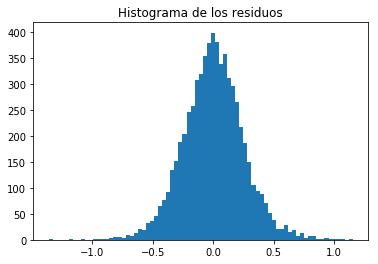

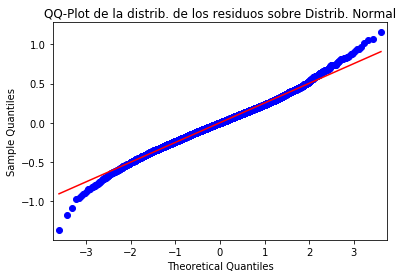

In [16]:
price_pred = linreg.predict(Xtest)
len(ytest)
len(price_pred)
residuals = ytest-price_pred
plt.hist(residuals,bins='fd')
plt.title("Histograma de los residuos")

sm.qqplot(residuals, line = 's')
plt.title("QQ-Plot de la distrib. de los residuos sobre Distrib. Normal")
plt.show()

> La distribución de los residuos es bastante simétrica y ciertamente asemeja a una normal, notar tambien que parece estar centrada en el valor 0.0, como es de esperarse luego de la normalización y escalamiento realizado, y correspondientose con la asumción de error gausiano. De la gráfica del qq-plot se observa que los cuartiles se corresponden bastante bien entre una distribuciín normal estandar y la distribución de los residuos exceptuando una leve diferencia de cuartiles en los extremos de la gráfica, que indican que la distribución de residuos tiene colas levemente más pesadas que la distribución normal teórica.<br>
> Finalmente, es razonable, de acuerdo al histograma, a la gráfica cuartil cuartil de la distribución de residuos y al fundamento teórico que respalda el fenómeno, asumir una distribución aproximadamente normal para los residuos de la regresión.

# 2) Selección de Atributos****

## Forward Step-Wise Selection (FSS)

> Podemos utilizar el coeficiente de determinación, definido de la siguiente forma:
$$R^2 = 1- \frac{SS_{res}}{SS_{tot}}$$
>El coeficiente de determinación provee una medida de qué tan bien los resultados observados son replicados por el modelo generado.<br>
> La variación propuesta consiste en maximizar el *accuracy* del modelo a través de la maximización del coeficiente de determinación, lo cual resulta similar a minimizar la suma de los residuos cuadrados de la regresión.

In [17]:
# Codigo entregado en Tarea

def fss(x_in,y_in, names_x, k = 10000):
    p = x_in.shape[1]-1 #No tomamos el intercepto dentro de las variables
    k = min(p,k) # Cantidad de iteraciones es la menor entre la cantidad de variables y un valor fijo
    names_x = np.array(names_x) #Recuperamos los nombres de las variables
    remaining = list(range(0,p))
    selected = [p] #partimos una lista vacia de largo p
    current_score = best_new_score = 0.0 #score inicial = 0
    r2_score_array = [p]
    total_vars = [p]
    training_errors = [p]
    test_errors = [p]
    
    while remaining and len(selected) <= k:
        score_candidates = []
        for candidate in remaining: # por cada candidato, hacemos un modelo nuevo incluyendolo y vemos que pasa
            model = lm.LinearRegression(fit_intercept = False)
            indexes = selected + [candidate]
            x_train, x_test, y_train, y_test = train_test_split(x_in,y_in,test_size = 0.3, random_state = 13)
            
            # Hacemos el fit para obtener el modelo y el error de entrenamiento
            predictions_train = model.fit(x_train, y_train).predict(x_train) #predice con las variables seleccionadas
            residuals_train = y_train-predictions_train # guardamos el error de entrenamiento para poder hacer el grafico
            SS_res_candidate = np.power(residuals_train,2) # esto es el error residual
            training_error_sum = np.sum(SS_res_candidate)
            training_error = np.power(training_error_sum, 0.5) # guardamos la norma 2 de los errores
            #Error de test
            
            predictions_test = model.fit(x_train,y_train)
            predictions_test = model.predict(x_test)
            residuals_test = y_test-predictions_test # guardamos el error de entrenamiento para poder hacer el grafico
            SS_res_candidate = np.power(residuals_test,2) # esto es el error residual
            test_error_sum = np.sum(SS_res_candidate)
            test_error = np.power(test_error_sum, 0.5) # guardamos la norma 2 de los errores
            
            r2_candidate = r2_score(y_train, predictions_train)
            score_candidates.append((r2_candidate, candidate, training_error)) #guarda los scores de los candidatos actuales
            
        score_candidates.sort(reverse = True) #Reordena los scores de menor a mayor
        best_new_score, best_candidate, current_attr_error = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        r2_score_array.append(best_new_score)
        total_vars.append(len(indexes))
        training_errors.append(current_attr_error)
        
    return selected, r2_score_array, total_vars, training_errors


names_regressors = Xtrain.columns #sin intercepto
#print("Atributos seleccionados en orden de selección \n")
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

atributos, coef_r2, total_vars, training_errors = fss(x_in = X,y_in = y, names_x = names_regressors)
atributos = names_regressors[atributos[1:]]
coef_r2 = coef_r2[1:]
total_vars = total_vars[1:]
training_errors = training_errors[1:]
table_r2 = pd.DataFrame({"Atributo Seleccionado":atributos.tolist(),"Cantidad de Variables Seleccionadas":total_vars,"$R^2$":coef_r2, "Error de Entrenamiento":training_errors})
table_r2 = table_r2[['Cantidad de Variables Seleccionadas', 'Atributo Seleccionado', '$R^2$', "Error de Entrenamiento"]]
table_r2

,Cantidad de Variables Seleccionadas,Atributo Seleccionado,$R^2$,Error de Entrenamiento
0,2,bedrooms,0.767013,31.105829
1,3,bathrooms,0.767013,31.105829
2,4,sqft_living,0.767013,31.105829
3,5,sqft_lot,0.767013,31.105829
4,6,floors,0.767013,31.105829
5,7,waterfront,0.767013,31.105829
6,8,view,0.767013,31.105829
7,9,condition,0.767013,31.105829
8,10,grade,0.767013,31.105829
9,11,sqft_above,0.767013,31.105829


> La tabla muestra el orden en el que se agregan las variables al modelo minimizando el coeficiente de determinación, y la precisión del modelo en cada paso. Se puede resumir el error en función del número de variables:

/Users/Ignacio/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


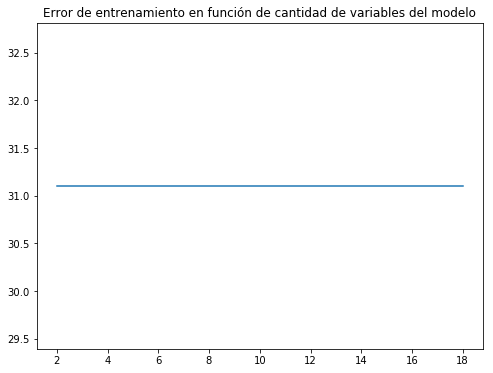

In [18]:
# por algun motivo extraño, esta celda tira un warning al correrla por primera vez

plt.figure(figsize = (8,6))
plt.plot(total_vars, training_errors)
plt.legend()
plt.title("Error de entrenamiento en función de cantidad de variables del modelo")
plt.axis("tight")
plt.show()

# 3) Regularización

## a) Ridge Regression
> En Ridge Regression la elección del parámetro de regularización carece de una regla clara. Nosotros proponemos una regla basada en elegir el $\lambda$ previo a que la media del error de cross-validation se dispare. En este caso el $\lambda$ adecuado debiese estar en el rango de $[10^4,10^3]$

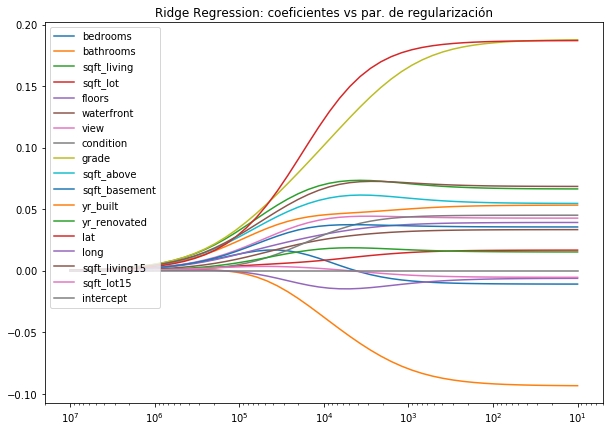

In [19]:
names_regressors = X.columns
alphas_ = np.logspace(7, 1, base = 10)
coefs = []
cv_err = []
model_ridge = Ridge(fit_intercept = True, solver = 'svd')

for a in alphas_:
    model_ridge.set_params(alpha = a)
    model_ridge.fit(Xtrain, ytrain)
    coefs.append(model_ridge.coef_)
    dummy,cv_err_estimates = cv_error(Xtrain,ytrain,k = 10, method = 'ridge', alpha = a)
    cv_err.append(np.mean(cv_err_estimates))

plt.figure(figsize = (10,7))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label = label)

plt.legend()
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.title("Ridge Regression: coeficientes vs par. de regularización")
plt.axis("tight")
plt.legend(loc = 2)
plt.show()

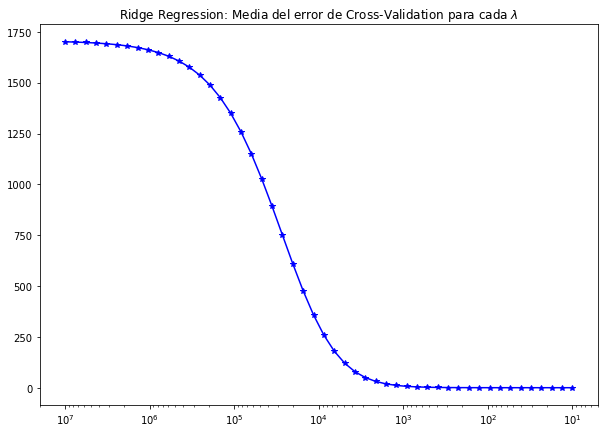

In [20]:
plt.figure(figsize = (10,7))
ax = plt.gca()
plt.plot(alphas_, cv_err,"b*-")
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.title("Ridge Regression: Media del error de Cross-Validation para cada $\lambda$")
plt.show()

> El gráfico anterior muestra el error de cross-validation para distintos parámetros de regularización en la regresión de Ridge, podemos ver como cerca del valor $\lambda = 10^{3}$ el error se dispara.

## b) Lasso
> Nuevamente, utilizamos una gráfica del error de cross-validation para estimar un rango de valores razonables para $\lambda$.

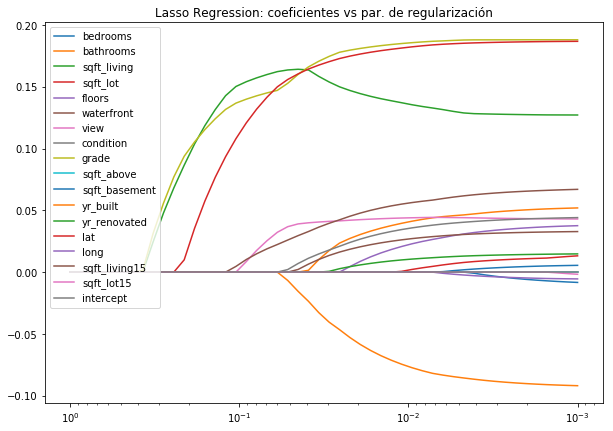

In [21]:
names_regressors = X.columns
alphas_ = np.logspace(0, -3, base = 10)
coefs = []
cv_err = []
model_lasso = Lasso(fit_intercept = True)

for a in alphas_:
    model_lasso.set_params(alpha = a)
    model_lasso.fit(Xtrain, ytrain)
    coefs.append(model_lasso.coef_)
    dummy,cv_err_estimates = cv_error(Xtrain,ytrain,k = 10, method = 'lasso', alpha = a)
    cv_err.append(np.mean(cv_err_estimates))

plt.figure(figsize = (10,7))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label = label)

plt.legend()
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.title("Lasso Regression: coeficientes vs par. de regularización")
plt.axis("tight")
plt.legend(loc = 2)
plt.show()

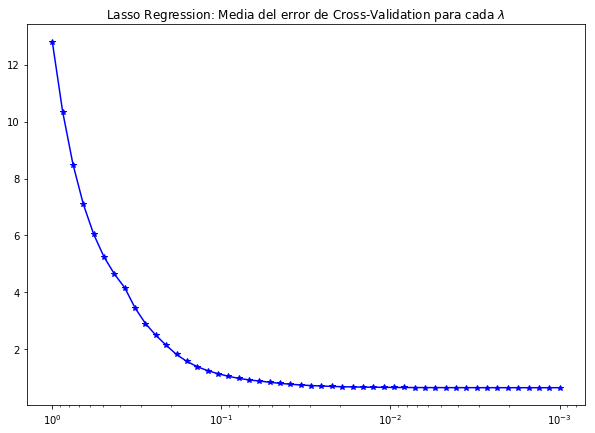

In [22]:
plt.figure(figsize = (10,7))
ax = plt.gca()
plt.plot(alphas_, cv_err,"b*-")
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.title("Lasso Regression: Media del error de Cross-Validation para cada $\lambda$")
plt.show()

## c) Error de pruebas y de entrenamiento
> Utilizaremos Lasso para evaluar el error de pruebas y entrenamiento por dos razones:
> - Lasso muestra un mejor rango de valores para $\lambda$ antes de disparar su error de Cross-Validation.
> - Lasso, a diferencia de Ridge, si selecciona atributos para el modelo, haciendo sus coeficientes 0.

> El gráfico previo describe el error de cross-validation para distintos valores del parámetro de regularización, es interesante que desde un valor cercano a $10^{-2}$ el error comienze a experimentar un aumento monótono creciente.

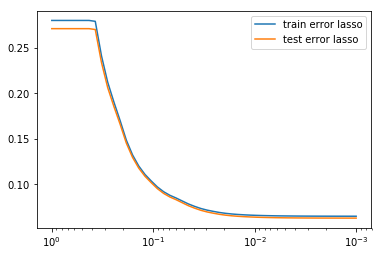

In [23]:
alphas_ = np.logspace(0, -3, base = 10)
coefs = []
model_lasso = Lasso(fit_intercept = True)
mse_test = []
mse_train = []

for a in alphas_:
    model_lasso.set_params(alpha = a)
    model_lasso.fit(Xtrain, ytrain)
    yhat_train = model_lasso.predict(Xtrain)
    yhat_test = model_lasso.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain,2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest,2)))
ax = plt.gca()
ax.plot(alphas_, mse_train, label = "train error lasso")
ax.plot(alphas_, mse_test, label = "test error lasso")
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

## d) Estimación del parámetro de regularización para Lasso
> Se presenta a continuación la idea sugerida en el enunciado de la tarea, tomando el parámetro óptimo como aquel que minimiza el error de la media de los cuadrados.

In [24]:
def MSE(y, yhat): return np.mean(np.power(y - yhat, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

kf = KFold(n_splits = 10)
best_cv_mse = float("inf")
model_lasso = Lasso(fit_intercept = True)
alphas_ = np.logspace(0, -3, base = 10)

for a in alphas_:
    model_lasso.set_params(alpha = a)
    mse_list_k10 = [MSE(model_lasso.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in kf.split(Xm)]
    
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        print("BEST PARAMETER = %f, MSE(CV) = %f"%(best_alpha,best_cv_mse))

BEST PARAMETER = 1.000000, MSE(CV) = 0.280148
BEST PARAMETER = 0.372759, MSE(CV) = 0.278773
BEST PARAMETER = 0.323746, MSE(CV) = 0.241438
BEST PARAMETER = 0.281177, MSE(CV) = 0.212461
BEST PARAMETER = 0.244205, MSE(CV) = 0.190604
BEST PARAMETER = 0.212095, MSE(CV) = 0.170255
BEST PARAMETER = 0.184207, MSE(CV) = 0.148750
BEST PARAMETER = 0.159986, MSE(CV) = 0.132530
BEST PARAMETER = 0.138950, MSE(CV) = 0.120296
BEST PARAMETER = 0.120679, MSE(CV) = 0.111069
BEST PARAMETER = 0.104811, MSE(CV) = 0.103941
BEST PARAMETER = 0.091030, MSE(CV) = 0.097321
BEST PARAMETER = 0.079060, MSE(CV) = 0.092108
BEST PARAMETER = 0.068665, MSE(CV) = 0.088177
BEST PARAMETER = 0.059636, MSE(CV) = 0.085212
BEST PARAMETER = 0.051795, MSE(CV) = 0.081955
BEST PARAMETER = 0.044984, MSE(CV) = 0.078685
BEST PARAMETER = 0.039069, MSE(CV) = 0.076015
BEST PARAMETER = 0.033932, MSE(CV) = 0.073708
BEST PARAMETER = 0.029471, MSE(CV) = 0.071943
BEST PARAMETER = 0.025595, MSE(CV) = 0.070572
BEST PARAMETER = 0.022230, MSE(CV)

> Se puede observar que esto en realidad siempre intentará tomar el menor parámetro posible, para no hacer selección real de atributos. Esto hace que el método en realidad no haga nada. Se propone usar un criterio alternativo: dejar de seleccionar atributos en el momento en el que el error del $\lambda_i$ sea más grande que el error del $\lambda_{i-1}$ por cierto factor definido de antemano.
> Notar que el mejor parámetro obtenido es razonable de acuedo a los gráficos del error de cross-validation anteriores, en los cuales se puede ver que dicho valor parece ser el mínimo buscado.

In [25]:
threshold_factor = 1.1 # debe ser mayor a 1

prev_MSE = 0
model_lasso = Lasso(fit_intercept = True)
for a in alphas_[::-1]:
    model_lasso.set_params(alpha = a)
    mse_list_k10 = [MSE(model_lasso.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in kf.split(Xm)]
    mse_mean = np.mean(mse_list_k10)
    
    if a == alphas_[::-1][-1]:
        print("No parameter was chosen. Please tighten the restriction.")
    
    if prev_MSE == 0:
        prev_MSE = mse_mean
    else:
        if prev_MSE * threshold_factor < mse_mean:
            print("Chosen parameter = %f, MSE(CV) = %f"%(a, prev_MSE))
            break
            

Chosen parameter = 0.029471, MSE(CV) = 0.065338


In [26]:
lasso_coef = model_lasso.coef_
table_coef_lasso = pd.DataFrame({'Atributo':Xtest.columns.tolist(),'Coeficiente':lasso_coef})
table_coef_lasso = table_coef_lasso[['Atributo','Coeficiente']] #Reordenar las columnas para que se vea bien
table_coef_lasso

,Atributo,Coeficiente
0,bedrooms,0.000000
1,bathrooms,0.017982
2,sqft_living,0.154003
3,sqft_lot,0.000000
4,floors,0.000000
5,waterfront,0.013460
6,view,0.041583
7,condition,0.015986
8,grade,0.174045
9,sqft_above,0.000000


In [27]:
table_final_lasso = table_coef_lasso[table_coef_lasso['Coeficiente']!=0]
print("Cantidad de atributos:", len(table_final_lasso))
print("Accuracy:", model_lasso.score(Xtest,ytest))
table_final_lasso


Cantidad de atributos: 10
Accuracy: 0.742486993408


,Atributo,Coeficiente
1,bathrooms,0.017982
2,sqft_living,0.154003
5,waterfront,0.013460
6,view,0.041583
7,condition,0.015986
8,grade,0.174045
11,yr_built,-0.041269
12,yr_renovated,0.000351
13,lat,0.170740
15,sqft_living15,0.039327


# 4) Drift

In [28]:
df_A = df_scaled.sample(1000,random_state=11)
frames=[]
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)), int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11)#crea el dataframe

# Creacion de los modelos entrenados en 

X_A = df_A.iloc[:,1:].values
y_A = df_A['price']
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A,y_A,test_size = 0.3,random_state = 42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B,y_B,test_size = 0.3,random_state = 42)


> Ahora procedemos a evaluar los dos models y a medir el error. Puesto que nos interesa verificar el *performance* de un modelo entrenado sobre un dominio inicial como predictor sobre otro dominio objetivo, compararemos los errores de validación de cada modelo en su respectivo dominio, y el obtenido al predecir el dominio objetivo.

In [50]:
#Para el modelo A Y B evaluado sobre su propio dominio
lm_A = lm.LinearRegression(fit_intercept=True)
lm_A.fit(Xtrain_A,ytrain_A)

predict_AA = lm_A.predict(Xval_A)
residual_val_AA = yval_A-predict_AA
SS_res_AA = np.power(residual_val_AA,2)
ho_val_err_sum_AA = np.sum(SS_res_AA)
ho_val_err_AA = np.power(ho_val_err_sum_AA,0.5)

lm_B = lm.LinearRegression(fit_intercept=True)
lm_B.fit(Xtrain_B,ytrain_B)

predict_BB = lm_B.predict(Xval_B)
residual_val_BB = yval_B-predict_BB
SS_res_BB = np.power(residual_val_BB,2)
ho_val_err_sum_BB = np.sum(SS_res_BB)
ho_val_err_BB = np.power(ho_val_err_sum_BB,0.5)
print("r-squared error del modelo A sobre el dominio A:",r2_score(yval_A,predict_AA))
print("r-squared error del modelo B sobre el dominio B:",r2_score(yval_B,predict_BB))
print("MSE del modelo A sobre el conjunto de validacion de A:", ho_val_err_AA)
print("MSE del modelo B sobre el conjunto de validacion de B:", ho_val_err_BB)

r-squared error del modelo A sobre el dominio A: 0.783639472491
r-squared error del modelo B sobre el dominio B: 0.881067325129
MSE del modelo A sobre el conjunto de validacion de A: 4.63484639662
MSE del modelo B sobre el conjunto de validacion de B: 5.97658677864


> Los errores de entrenamiento son bastante similares, sin embargo, el error de $r^2$ tiene un valor mayor para el modelo B sobre su dominio fuente. Ahora procedemos a evaluar los modelos en el dominio objetivo y estudiar el error de validacion correspondiente

In [49]:
#Para el modelo A Y B evaluado sobre su dominio obj
lm_A = lm.LinearRegression(fit_intercept=True)
lm_A.fit(Xtrain_A,ytrain_A)

predict_AB = lm_A.predict(Xval_B)
residual_val_AB = yval_B-predict_AB
SS_res_AB = np.power(residual_val_AB,2)
ho_val_err_sum_AB = np.sum(SS_res_AB)
ho_val_err_AB = np.power(ho_val_err_sum_AB,0.5)

lm_B = lm.LinearRegression(fit_intercept=True)
lm_B.fit(Xtrain_B,ytrain_B)

predict_BA = lm_B.predict(Xval_A)
residual_val_BA = yval_A-predict_BA
SS_res_BA = np.power(residual_val_BA,2)
ho_val_err_sum_BA = np.sum(SS_res_BA)
ho_val_err_BA = np.power(ho_val_err_sum_BA,0.5)

print("r-squared error del modelo A sobre el dominio B:",r2_score(yval_B,predict_AB))
print("r-squared error del modelo B sobre el dominio A:",r2_score(yval_A,predict_BA))
print("MSE del modelo A sobre el conjunto de validacion de B:", ho_val_err_AB)
print("MSE del modelo B sobre el conjunto de validacion de A:", ho_val_err_BA)

r-squared error del modelo A sobre el dominio B: 0.848605393731
r-squared error del modelo B sobre el dominio A: 0.749662295117
MSE del modelo A sobre el conjunto de validacion de B: 6.74307263583
MSE del modelo B sobre el conjunto de validacion de A: 4.98550852356


> Finalmente, los errores de validacion sobre los dominios objetivos son similares a pesar de la diferencia de distribuciones, lo que hace factible la predicción curzada para ambos modelos sobre sus respectivos dominios objetivo.<br>
> Notar finalmente, que el modelo A tiene mejor accuracy sobre su dominio objetivo que B por lo tanto, de tener que ser escogido alguno de los modelos, se escogería A, debido a que presenta mejor versatilidad en dominios ajenos al propio.

## 5) Regresión Logística

> Este es un problema de clasificación, por lo tanto lo abordaremos con una regresión logística, en primer lugar, se debe hacer una limpieza del dataset y eliminar la columna 'Normal', pues representa una variable categórica en forma de variable cuantitativa. Luego, utilizaremos el valor de la variable 'max_heart_rate' para clasificar a las personas en dos grupos de riesgo: 'Normal' o 'Alto'.

In [38]:
headers = ["age",
           "sex",
           "chest_pain",
           "blood_pressure",
           "serum",
           "blood_sugar",
           "ecg_results",
           "max_heart_rate",
           "angina",
           "oldpeak",
           "ex_st_slope",
           "flourosopy_vessels",
           "thal",
           "normal"]
df = pd.read_csv("heart.dat", header = None, names = headers, sep = " ")

# malabares con columnas para que quede igual al formato del otro dataframe

cols = df.columns.tolist()
cols.remove("max_heart_rate")
cols = ["max_heart_rate"] + cols
df = df[cols]
df.drop(["normal"], axis = 1, inplace = True)
df.insert(df.shape[1], 'Riesgo','')
df.head()

,max_heart_rate,age,sex,chest_pain,blood_pressure,serum,blood_sugar,ecg_results,angina,oldpeak,ex_st_slope,flourosopy_vessels,thal,Riesgo
0,109.0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,0.0,2.4,2.0,3.0,3.0,
1,160.0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,0.0,1.6,2.0,0.0,7.0,
2,141.0,57.0,1.0,2.0,124.0,261.0,0.0,0.0,0.0,0.3,1.0,0.0,7.0,
3,105.0,64.0,1.0,4.0,128.0,263.0,0.0,0.0,1.0,0.2,2.0,1.0,7.0,
4,121.0,74.0,0.0,2.0,120.0,269.0,0.0,2.0,1.0,0.2,1.0,1.0,3.0,


> Estudiamos la distribución y dispersión de la variable 'max_heart_rate' con el objetivo de ver posibles outliers que sean de utilidad en la clasificación.

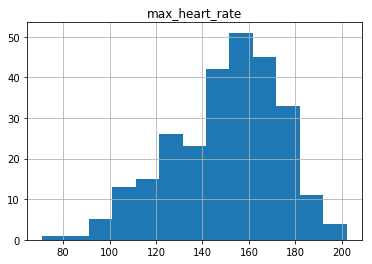

count    270.00
mean     149.68
std       23.17
min       71.00
25%      133.00
50%      153.50
75%      166.00
max      202.00
Name: max_heart_rate, dtype: float64

In [39]:
df.hist(column = 'max_heart_rate', bins ='fd')
max_heart = df['max_heart_rate']
plt.show()
max_heart.describe().round(2)

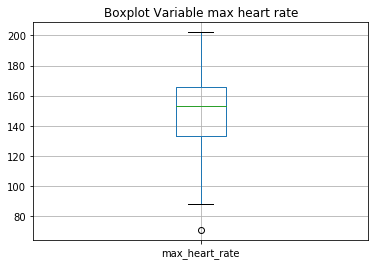

In [40]:
df.boxplot(column = ['max_heart_rate'], return_type = 'axes')
plt.title("Boxplot Variable max heart rate")
plt.show()

> Ya que la variable *max heart rate* no tiene outliers, utilicemos el tercer cuartil para discriminar a aquellos que tienen probabilidad de ataque.

In [41]:
df['Riesgo'] = np.where((df['max_heart_rate']>df['max_heart_rate'].quantile(.75)),'Alto','Normal')
#df['Riesgo'] = np.where((df['max_heart_rate']<=166) & (df['max_heart_rate']>=153.50),'En Riesgo',df['Riesgo'])
df.drop(['max_heart_rate'], axis = 1, inplace = True)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
#Consideraremos como outlier a aquel dato que este sobre el cuartil 3
y = df['Riesgo']
y = np.ravel(y)
X = df.iloc[:,:len(X.columns)-1]

le = preprocessing.LabelEncoder()
encoded = le.fit_transform(y)

Xtrain, Xtest, ytrain, ytest,  = train_test_split(X,encoded,test_size = 0.3, random_state = 13)
model = LogisticRegression()
model = model.fit(Xtrain, ytrain)
ypred_test = model.predict(Xtest)
ypred_train = model.predict(Xtrain)
print("Accuracy sobre conjunto de entrenamiento:",accuracy_score(ytrain,ypred_train).round(4))
print("Accuracy sobre conjunto de prueba:",accuracy_score(ytest,ypred_test).round(4))

print(model.coef_)

Accuracy sobre conjunto de entrenamiento: 0.8042
Accuracy sobre conjunto de prueba: 0.7284
[[ 0.09155845 -0.18770069  0.26423514 -0.02038572 -0.00371269  0.34287307
   0.07977384  0.97140275  0.64918354  0.00710966 -0.14395792 -0.00980453]]


> Obtuvimos un buen error de ajuste r-squared sobre los datos a catalogar, por lo tanto es un modelo razonable para utilización.